## Week 12 - Assignment

Write Python code that can create a CSV containing 10 columns of text data​

Each entry in each row should be between 3 and 25 characters​
Adjacent rows in a CSV should not be the same​
Generate files of size {0.1, 1, 5, 10, 100, 500} MB of data​
Execution time for creating all of the data to be written to file should take less than 5 minutes. (Email me if you do not solve this in less than an hour.)​ ​

The precision of the file sizes is +/- 20%.

Measure how much time it takes to write each CSV file to disk. In your measurement do not include the time used in creating the CSV files. Perform this measurement three times per file size. Each measurement is of a different CSV. That's three different files per file size.​

Measure how much time it takes for your computer to load the data from the CSV on disk into a Pandas dataframe. Perform this measurement three times per file size. Each measurement is of a different CSV.​

> Import necessary libraries

In [1]:
import pandas as pd
import random
import csv
import time
import os
import sys
import string
from functools import reduce
import matplotlib.pyplot as plt
from pylab import scatter
import pylab
from matplotlib import pyplot
from matplotlib.pyplot import figure


> Function to fetch names randomly from a text file(names.txt)

In [2]:
def get_names():
    fid = open('names.txt', 'r').read().split('\n')
    final_names = random.choice(fid)
    return final_names

> Function to generate csv files with random data when number of rows is given as input

In [3]:
def dframe_tocsv(number_needed):
    global df  
    df = [] 
    
    for i in range(0, number_needed):
        df.append({
        'employee_id': random.randint(100000,999999),
        'name': get_names(),
        'dept_id': random.choice(['010','020', '030', '040', '050']),
        'phone#': random.randrange(4000000000,4999999999),
        'gender': random.choice(['male','female']),
        'join_year':random.randint(1940,1990),
        'zip_code': random.randint(10000,70000),
        'born_year': random.randint(1940,1990),
        'cat_val': random.choice(['rent','own']),    
        'annual_income(USD)': random.randrange(10000,90000, 2)})
    df = pd.DataFrame(df)
    df = df[['employee_id','name','dept_id','phone#', 'gender', 'join_year','zip_code', 'born_year', 'cat_val', 'annual_income(USD)']]
    return df

> * To generate csv files of 0.1mb, 1mb, 5mb,10mb
*   3 files for each file size is generated
* Calculating the average time elapsed to write each file to disk and storing into a dictionary

In [4]:
number_of_tests=3
list_of_row_size=[1400, 14000, 70000, 130000]
serial_results={}
for row_count in list_of_row_size:
    test_results=[]
    for test_indx in range(number_of_tests):
        dframe_tocsv(row_count)
        start_time=time.time()
        df.to_csv("testdata{0}_{1}.csv".format(row_count,test_indx),sep=' ')
        test_results.append(time.time() - start_time)
        size = os.path.getsize("testdata{0}_{1}.csv".format(row_count,test_indx))/(1024*1024)
        size_round = round(size,2)
    
    serial_results[size_round]=round(sum(test_results)/number_of_tests,2)
    
    print('elapsed time:',round(sum(test_results)/number_of_tests,2),'for',size_round, 'MB')

elapsed time: 0.02 for 0.1 MB
elapsed time: 0.13 for 1.01 MB
elapsed time: 0.58 for 5.09 MB
elapsed time: 1.06 for 9.49 MB


> * To generate csv file of size 100 mb
*   3 files of 100mb are generated
* Calculating the average time elapsed to write each file to disk and storing into a dictionary

In [5]:
number_of_tests=3
test_results = []
for test_indx in range(number_of_tests):
    df_1 = pd.read_csv("testdata130000_{0}.csv".format(test_indx),sep=' ')
    dfs = [ df_1, df_1, df_1, df_1, df_1,df_1, df_1, df_1, df_1, df_1 ]
    df_final = pd.concat(dfs, ignore_index=True)
    start_time=time.time()
    df_final.to_csv("testdata100_{0}.csv".format(test_indx),sep=' ')
    test_results.append(time.time() - start_time)
    size = os.path.getsize("testdata100_{0}.csv".format(test_indx))/(1024*1024)
    size_round = round(size,2)
    
serial_results[size_round]=round(sum(test_results)/number_of_tests,2)
    
print('elapsed time:',round(sum(test_results)/number_of_tests,2),'for',size_round, 'MB')

elapsed time: 13.6 for 110.6 MB


> * To generate csv file of size 500 mb
*   3 files of 500mb each are generated
* Calculating the average time elapsed to write each file to disk and storing into a dictionary

In [6]:
number_of_tests=3
test_results = []
for test_indx in range(number_of_tests):
    df_1 = pd.read_csv("testdata100_{0}.csv".format(test_indx),sep=' ')
    dfs = [ df_1, df_1, df_1, df_1, df_1 ]
    df_final = pd.concat(dfs, ignore_index=True)
    start_time=time.time()
    df_final.to_csv("testdata500_{0}.csv".format(test_indx),sep=' ')
    test_results.append(time.time() - start_time)
    size = os.path.getsize("testdata500_{0}.csv".format(test_indx))/(1024*1024)
    size_round = round(size,2)
    
serial_results[size_round]=round(sum(test_results)/number_of_tests,2)
    
print('elapsed time:',round(sum(test_results)/number_of_tests,2),'for',size_round, 'MB')

elapsed time: 75.6 for 605.34 MB


> Storing all the average times elapsed to write each file size to disk into a dictionary

In [7]:
serial_results

{0.1: 0.02, 1.01: 0.13, 5.09: 0.58, 9.49: 1.06, 110.6: 13.6, 605.34: 75.6}

> Dataframe for write values is generated

In [8]:
writeval = pd.DataFrame(list(serial_results.items()), columns=['Size', 'WriteTime'])
writeval

,Size,WriteTime
0,0.10,0.02
1,1.01,0.13
2,5.09,0.58
3,9.49,1.06
4,110.60,13.60
5,605.34,75.60


> Reading all the files for each files size into dataframe and calculating the time elapsed to load the csv data on disk to dataframe

In [9]:
number_of_tests=3
list_of_row_size=[1400, 14000, 70000, 130000,100,500]

disktodf_results = {}

for row_count in list_of_row_size:
    test_results = []This 
    for test_indx in range(number_of_tests):
        start_time=time.time()
        df =  pd.read_csv("testdata{0}_{1}.csv".format(row_count,test_indx))
        #df = {values: pd.read_csv("testdata{0}_{1}.csv".format(row_count,test_indx))   for values in dataframes}
        test_results.append(time.time() - start_time)
        size = os.path.getsize("testdata{0}_{1}.csv".format(row_count,test_indx))/(1024*1024)
        size_round = round(size,2)
    disktodf_results[size_round]= round(sum(test_results)/number_of_tests,2)
    print('elapsed time:',round(sum(test_results)/number_of_tests,2),'seconds','for',size_round, 'MB')
    
    

elapsed time: 0.02 seconds for 0.1 MB
elapsed time: 0.03 seconds for 1.01 MB
elapsed time: 0.11 seconds for 5.09 MB
elapsed time: 0.21 seconds for 9.49 MB
elapsed time: 2.44 seconds for 110.6 MB
elapsed time: 11.05 seconds for 605.34 MB


> Storing the Read values into dictionary

In [10]:
disktodf_results

{0.1: 0.02, 1.01: 0.03, 5.09: 0.11, 9.49: 0.21, 110.6: 2.44, 605.34: 11.05}

> Dataframe with read values is generated

In [11]:
readval = pd.DataFrame(list(disktodf_results.items()), columns=['Size', 'ReadTime'])
readval

,Size,ReadTime
0,0.10,0.02
1,1.01,0.03
2,5.09,0.11
3,9.49,0.21
4,110.60,2.44
5,605.34,11.05


> Merging both thedataframes with read values and write values

In [12]:
read_write = pd.merge(writeval, readval, how='outer')
read_write

,Size,WriteTime,ReadTime
0,0.10,0.02,0.02
1,1.01,0.13,0.03
2,5.09,0.58,0.11
3,9.49,1.06,0.21
4,110.60,13.60,2.44
5,605.34,75.60,11.05


> Plotting the average write times and average load times versus file size in a single scatter plot with semilogx scale

Text(0.5, 1.0, 'Scaling of file I/O')

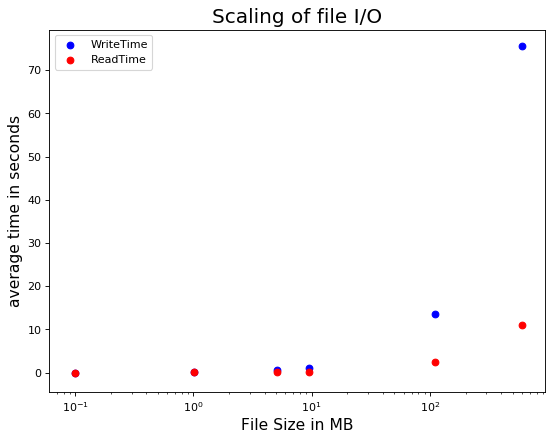

In [13]:
figure(num=None, figsize=(8, 6), dpi=80)
_=plt.scatter(read_write.Size,read_write.WriteTime,label = 'WriteTime',color='blue')
_=plt.scatter(read_write.Size,read_write.ReadTime,label = 'ReadTime', color='red')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('File Size in MB',fontsize=14)
pyplot.xscale('log')
plt.legend()
#plt.grid()
plt.title('Scaling of file I/O',fontsize=18)

